<a href="https://colab.research.google.com/github/xo-bot1997/Project-Repository/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download the stopwords list
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('table_ASRS.csv')

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Fix abbreviations
    words = text.split()
    fixed_words = [abbreviations.get(word.lower(), word) for word in words]
    fixed_text = ' '.join(fixed_words)

    # Remove numbers and special characters
    text = re.sub(r'\d+', '', fixed_text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Predefined dictionary of abbreviations and their corresponding expansions
abbreviations = {
    'abbr': 'abbreviation',
    'exp': 'expansion',
    'acft': 'aircraft',
    'eng': 'engine',
    'flt': 'flight',
    'rptr': 'reporter',
    'capt': 'captain',
    'lndg': 'landing',
    'rwy': 'runway',
    'emer': 'emergency',
    'kt': 'knot',
    'tkof': 'takeoff',
    'gnd': 'ground',
    'apch': 'approach',
    'chk': 'check',
    'pwr': 'power',
    'evac': 'evacuation',
    'hyd': 'hydraulic',
    'mech': 'mechanic'
}

# Apply preprocessing to the 'Text' column and store the result in a new column 'processed_text'
df['processed_text'] = df['Text'].apply(preprocess_text)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Save the updated DataFrame to a new CSV file
df.to_csv('preprocessed_table_ASRS.csv', index=False)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('vader_lexicon')
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the preprocessed text
df['sentiment_scores'] = df['processed_text'].apply(lambda x: sid.polarity_scores(x))

# Extract the compound sentiment score from the sentiment scores dictionary
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Classify the sentiment based on the compound score
df['sentiment'] = df['compound_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Save the sentiment analysis results to a new CSV file
df.to_csv('sentiment_analysis_results.csv', index=False)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Count the number of positive, negative, and neutral sentiments
sentiment_counts = df['sentiment'].value_counts()

# Print the sentiment counts
print("Sentiment Counts:")
print(sentiment_counts)




Sentiment Counts:
Negative    10546
Positive    10059
Neutral       914
Name: sentiment, dtype: int64


In [ ]:

# Determine the sentiment dominance
dominant_sentiment = sentiment_counts.idxmax()
print("Dominant Sentiment: ", dominant_sentiment)



Dominant Sentiment:  Negative


In [ ]:

# Calculate the percentage of each sentiment category
sentiment_percentages = sentiment_counts / len(df) * 100

# Print the sentiment percentages
print("\nSentiment Percentages:")
print(sentiment_percentages)



Sentiment Percentages:
Negative    49.007854
Positive    46.744737
Neutral      4.247409
Name: sentiment, dtype: float64


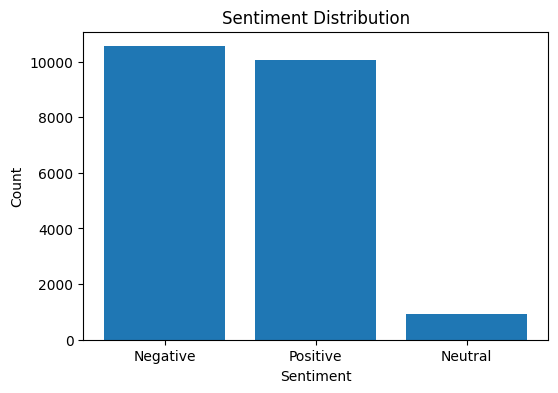

In [ ]:


# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:


# Read the preprocessed CSV file
df = pd.read_csv('preprocessed_table_ASRS.csv')

# Create a CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Adjust the number of features as desired

# Generate the document-term matrix
dtm = vectorizer.fit_transform(df['processed_text'])

# Instantiate and fit the LDA model
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_indices = topic.argsort()[:-10-1:-1]  # Get the top 10 words
    top_words.append([feature_names[i] for i in top_words_indices])

# Print the top words for each topic
for i, words in enumerate(top_words):
    print(f'Topic {i+1}:')
    print(', '.join(words))
    print()

# Assign the topic labels to the DataFrame
df['topic_label'] = lda.transform(dtm).argmax(axis=1)

# Save the updated DataFrame to a new CSV file
df.to_csv('topic_labeled_table_ASRS.csv', index=False)


Topic 1:
runway, aircraft, taxiway, clear, hold, taxi, tower, short, turn, land

Topic 2:
aircraft, maintain, report, flight, check, engine, number, say, state, would

Topic 3:
airport, approach, flight, fly, call, would, mile, south, control, land

Topic 4:
foot, aircraft, descend, climb, turn, control, degree, flightlevel, clear, altitude

Topic 5:
land, passenger, flightattendant, aircraft, runway, airport, left, right, captain, report

